<pre>

Data:

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


</pre>

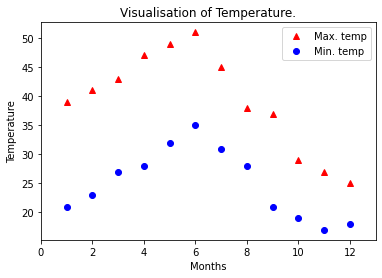

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
months = np.arange(1,13)

plt.plot(months, Max,"r^",label="Max. temp")
plt.plot(months, Min, "bo", label="Min. temp")
plt.xlabel("Months")
plt.xlim(0,13)
plt.ylabel("Temperature")
plt.title("Visualisation of Temperature.")
plt.legend(loc="best")

In [2]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset)*2*np.pi/times.max()))

In [3]:
res_max, cov_max = optimize.curve_fit(yearly_temps,months, Max)

res_min, cov_min = optimize.curve_fit(yearly_temps,months, Min)

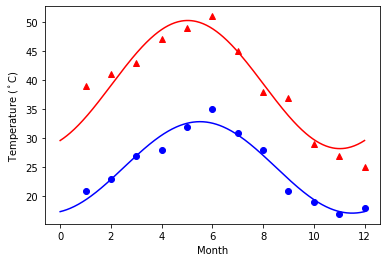

In [4]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'r^')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

<hr>

## Plotting with matplotlib

<hr>

In [6]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


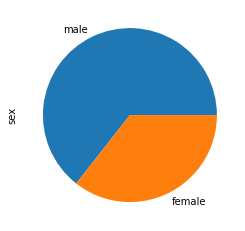

In [8]:
data["sex"].value_counts().plot(kind="pie")

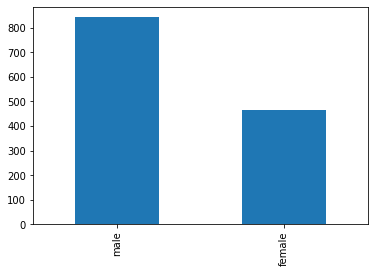

In [9]:
data["sex"].value_counts().plot(kind="bar")

Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

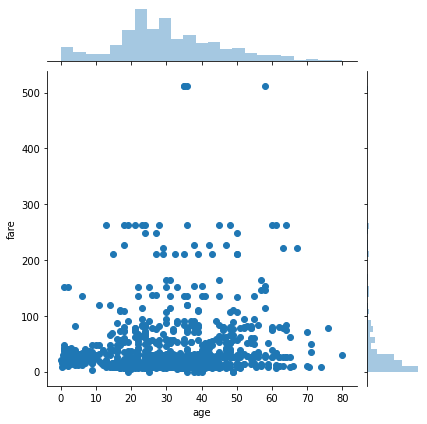

In [10]:
import seaborn as sns

sns.jointplot(x="age", y="fare", data=data)

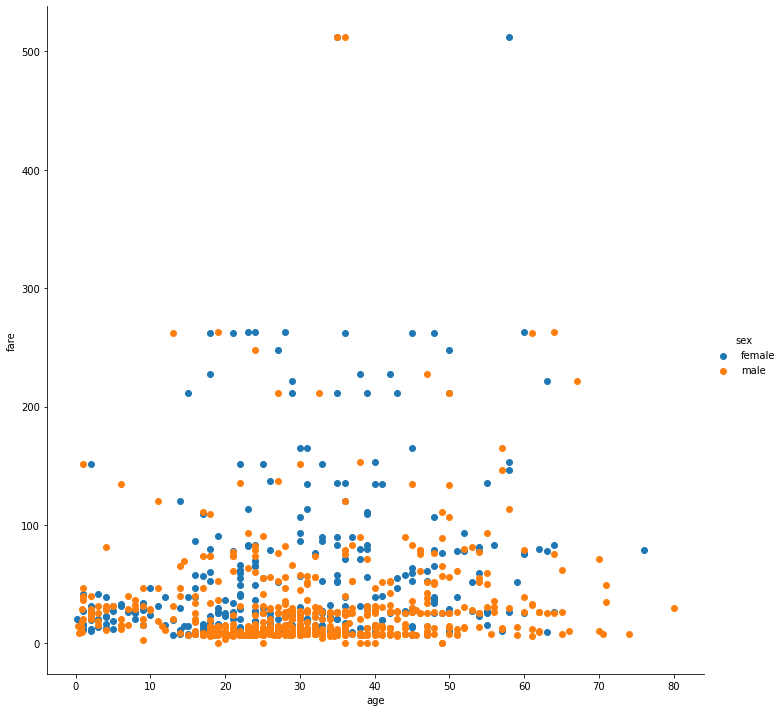

In [16]:
sns.FacetGrid(data=data,hue="sex",height=10).map(plt.scatter, "age", "fare").add_legend()

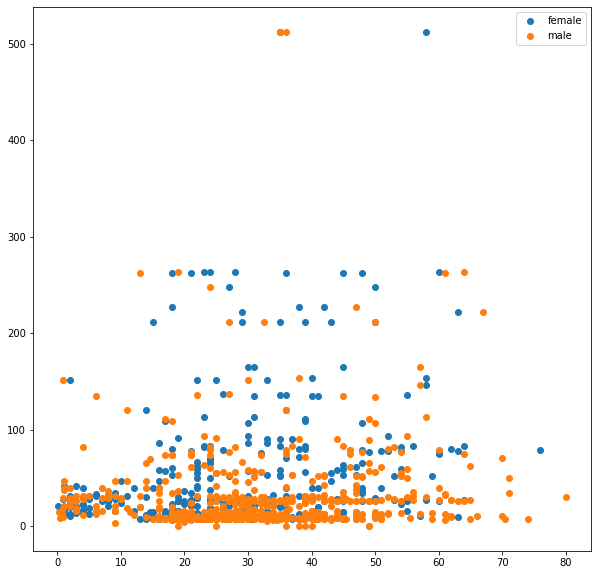

In [27]:
groups = data.groupby("sex")

plt.figure(figsize=(10,10))
for name, group in groups:
    plt.plot(group["age"], group["fare"],"o", label=name)
plt.legend()